In [1]:
import numpy as np
import matplotlib.pyplot as plt

* Wiener Process // Brown Motion에서 착안?

$\Delta W = \sqrt{\Delta t}\epsilon, \epsilon $~ $N(0,1)$

주가의 불확실한 움직임을 그나마 모델링 할 수 있는 근거

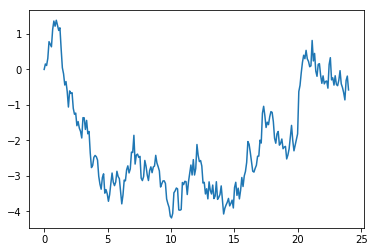

In [35]:
n=252 # 영업일 
year=1 # 기간 // if year이 2 이상이면 n 도 그만큼 추가해야한다.
times=np.linspace(0,year*24,n) #1일
dtimes=np.diff(times) # delta t

np.random.seed(42)
e=np.random.normal(size=n)
wpath=[0]

for i,dt in enumerate(dtimes):
    w=np.sqrt(dt)*e[i]
    wpath.append(wpath[-1]+w)
    
plt.plot(times,wpath)

In [41]:
dtimes

array([0.00398406, 0.00398406, 0.00398406, 0.00398406, 0.00398406,
       0.00398406, 0.00398406, 0.00398406, 0.00398406, 0.00398406,
       0.00398406, 0.00398406, 0.00398406, 0.00398406, 0.00398406,
       0.00398406, 0.00398406, 0.00398406, 0.00398406, 0.00398406,
       0.00398406, 0.00398406, 0.00398406, 0.00398406, 0.00398406,
       0.00398406, 0.00398406, 0.00398406, 0.00398406, 0.00398406,
       0.00398406, 0.00398406, 0.00398406, 0.00398406, 0.00398406,
       0.00398406, 0.00398406, 0.00398406, 0.00398406, 0.00398406,
       0.00398406, 0.00398406, 0.00398406, 0.00398406, 0.00398406,
       0.00398406, 0.00398406, 0.00398406, 0.00398406, 0.00398406,
       0.00398406, 0.00398406, 0.00398406, 0.00398406, 0.00398406,
       0.00398406, 0.00398406, 0.00398406, 0.00398406, 0.00398406,
       0.00398406, 0.00398406, 0.00398406, 0.00398406, 0.00398406,
       0.00398406, 0.00398406, 0.00398406, 0.00398406, 0.00398406,
       0.00398406, 0.00398406, 0.00398406, 0.00398406, 0.00398

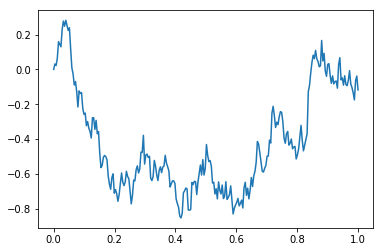

In [37]:
n=252
year=1
times=np.linspace(0,year,n)
dtimes=np.diff(times)

np.random.seed(42)
e=np.random.normal(size=n)
wpath=np.zeros_like(times)
for i,dt in enumerate(dtimes):
    w=np.sqrt(dt)*e[i]
    wpath[i+1]=wpath[i]+w
    
plt.plot(times,wpath)

In [42]:
e

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

* GBM(Geometric Brownian Motion)

미래의 주가 움직임을 표현한 확률 미분방정식

$\frac{\Delta S}{S} = \mu\Delta t + \sigma\Delta W$

$ \mu $ = 주가의 기대 수익률 // $\sigma$ =주가 수익률의 변동성 // $\Delta W$ = 위너 프로세스


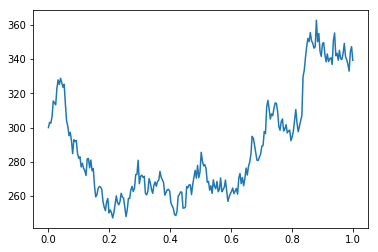

In [56]:
n=252 #1 1년 영업일 기준
year=1
times=np.linspace(0,year,n)
dtimes=np.diff(times)

s=np.zeros(n) #주가 
mu=0.2 #주가의 기대 수익률
sigma=0.3 #주가 수익률의 변동성
s[0]=300 #주가의 초깃값 s(0)이라 생각하면 

np.random.seed(42)
e=np.random.normal(size=n)
for i,dt in enumerate(dtimes):
    
    dw=np.sqrt(dt)*e[i]
    
    s[i+1]=s[i]*(1+mu*dt+sigma*dw)
    
plt.plot(times,s)

* Euler's Methond 

$y'=f(x,y)$를 풀어내는 수치해석 // 미분방정식 풀이 방법중 하나

* 주가의 로그정규분포를 가정 + Ito's Process

$\Delta lnS = (\mu-\frac{1}{2}\sigma^2)\Delta t + \sigma\Delta W$